In [580]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sqlite3
%matplotlib inline

import os

for directory,_,filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(directory,filename))

./df_artists.csv
./df_songs.csv
./data.db
./df_genres2.csv
./team_project_JS_MD_MM.ipynb
./df_songs2.csv
./data_engineer_genre.csv
./data_analysis_jeremy_stanley.ipynb
./Spotify_VIsualization_MM.ipynb
./df_characteristics.csv
./Spotify-data-ans.ipynb
./Spotify-2000.csv
./df_genres.csv
./.ipynb_checkpoints/team_project_JS_MD_MM-checkpoint.ipynb
./.ipynb_checkpoints/Spotify_VIsualization_MM-checkpoint.ipynb
./.git/ORIG_HEAD
./.git/config
./.git/HEAD
./.git/description
./.git/index
./.git/packed-refs
./.git/COMMIT_EDITMSG
./.git/FETCH_HEAD
./.git/objects/9b/793c9e29d612eb9cd1442a00b6c409dcac6d48
./.git/objects/56/76434fe41c2e98cd22b05c65f2b221f75e8426
./.git/objects/33/9d0266bb4e6f1544a268d4e9129d98cc01f617
./.git/objects/d1/742317b78866fbcc1338151a7b3759bdfd22d1
./.git/objects/d1/cbc42a021ce5ed5302a1cf5d514c220712ef35
./.git/objects/pack/pack-6abed87de8fd00618e7dd940ff123dcff63a53c2.pack
./.git/objects/pack/pack-6abed87de8fd00618e7dd940ff123dcff63a53c2.idx
./.git/objects/7c/478f31fdc6226

In [581]:
cnx = sqlite3.connect('./data.db')

# df_songs = pd.read_sql_query("SELECT * FROM songs", cnx)
df_songs = pd.read_csv('df_songs2.csv')


In [582]:
df_artists = pd.read_sql_query("SELECT * FROM artist", cnx)

In [583]:
df_genre = pd.read_csv('df_genres2.csv')

In [584]:
df_char = pd.read_sql_query("SELECT * FROM characteristics", cnx)
df_char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   song_id       1994 non-null   int64
 1   bpm           1994 non-null   int64
 2   energy        1994 non-null   int64
 3   danceability  1994 non-null   int64
 4   db            1994 non-null   int64
 5   liveness      1994 non-null   int64
 6   valence       1994 non-null   int64
 7   length        1994 non-null   int64
 8   acousticness  1994 non-null   int64
 9   speechiness   1994 non-null   int64
 10  popularity    1994 non-null   int64
dtypes: int64(11)
memory usage: 171.5 KB


In [585]:
df_songs.head(2)

,song_id,title,year,artist_id,genre_id
0,0,Sunrise,2004,0,0
1,33,Don't Know Why,2002,0,0


In [588]:
data = df_songs.merge(df_genre).merge(df_artists).merge(df_char)

In [589]:
df = data[~data['genre_name'].isin(genre_less10)]

In [590]:
df.head()

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
0,0,Sunrise,2004,0,0,adult standards,Norah Jones,157,30,53,-14,11,68,201,94,3,71
1,33,Don't Know Why,2002,0,0,adult standards,Norah Jones,88,20,73,-12,7,62,186,88,3,74
2,10,Love Me Tender,2002,10,0,adult standards,Elvis Presley,109,5,44,-16,11,31,162,88,4,49
3,144,A Little Less Conversation - JXL Radio Edit Remix,2002,10,0,adult standards,Elvis Presley,115,97,60,-6,13,72,212,0,5,64
4,387,(You're The) Devil in Disguise,2002,10,0,adult standards,Elvis Presley,123,73,48,-8,11,87,140,57,17,65


# Explore top 10 genres

In [591]:
top10_genres = df.groupby('genre_name').count().\
sort_values(by='artist_id',ascending=False)[:10].reset_index()['genre_name']

top10_genres

0                rock
1                 pop
2               dutch
3     adult standards
4               metal
5                soul
6      permanent wave
7    british invasion
8                folk
9               dance
Name: genre_name, dtype: object

In [592]:
bottom10_genres = df.groupby('genre_name').count().\
sort_values(by='artist_id',ascending=False)[:-10:-1].reset_index()['genre_name']

bottom10_genres

0    mellow gold
1       big beat
2         reggae
3        country
4        hip hop
5     neo mellow
6           funk
7          disco
8          dance
Name: genre_name, dtype: object

In [593]:
df_top10_genres = df[df['genre_name'].isin(list(top10_genres))]
df_top10_genres.head(1)

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
0,0,Sunrise,2004,0,0,adult standards,Norah Jones,157,30,53,-14,11,68,201,94,3,71


In [594]:
df_bottom10_genres = df[df['genre_name'].isin(list(bottom10_genres))]
df_bottom10_genres.head(1)

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
980,2,Clint Eastwood,2001,2,2,hip hop,Gorillaz,168,69,66,-9,7,52,341,2,17,69


In [595]:
len(df),len(df_top10_genres)

(1891, 1776)

In [596]:
print(f'The top 10 genres contain {round( (len(df_top10_genres) / len(df) ),2)} of all the records')

The top 10 genres contain 0.94 of all the records


In [597]:
df_top10_genres.head(1)

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
0,0,Sunrise,2004,0,0,adult standards,Norah Jones,157,30,53,-14,11,68,201,94,3,71


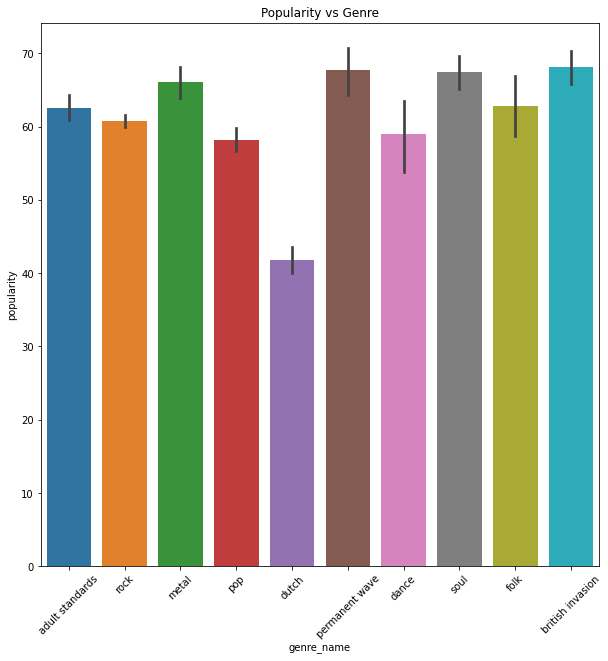

In [598]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_top10_genres,x='genre_name',y='popularity')
plt.xticks(rotation=45)
plt.title('Popularity vs Genre')
plt.show()

In [599]:
# df_char.columns

In [600]:
# df_char.info()

In [601]:
# for col in df_char.columns:
#     if col not in ['song_id']:
#         plt.figure(figsize=(15,10))
#         snbarplotarplot(data=df_top10_genres,x='genre_name',y=col, palette='BuGn')
#         plt.title(f'Top 10 Genres vs {col.upper()}')
#         plt.xticks(rotation=45)
#         plt.xlabel('Genres')
#         plt.ylabel(col.upper())
#         plt.show()

In [602]:
# for col in df_char.columns:
#     if col not in ['song_id']:
#         plt.figure(figsize=(15,10))
#         sns.barplot(data=df_bottom10_genres,x='genre_name',y=col, palette='coolwarm')
#         plt.title(f'Bottom 10 Genres vs {col.upper()}')
#         plt.xticks(rotation=45)
#         plt.xlabel('Genres')
#         plt.ylabel(col.upper())
#         plt.show()

In [603]:
# for col in df_char.columns:
#     if col not in ['song_id']:
#         plt.figure(figsize=(15,10))
#         sns.barplot(data=df_top10_genres,x='genre_name',y=col ,alpha=0.7,color='green', label='Top 10' )
#         sns.barplot(data=df_bottom10_genres,x='genre_name',y=col, alpha=0.5,color='red',label='Bottom 10')
#         plt.title(f'Bottom 10 vs Top 10 Genres vs {col.upper()}')
#         plt.xticks(rotation=45)
#         plt.xlabel('Genres')
#         plt.ylabel(col.upper())
#         plt.legend()
#         plt.show()
        

In [604]:
df_top10_genres.groupby('genre_name')[[x for x in df_char.columns if x != 'song_id']].mean()

,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
genre_name,,,,,,,,,,
adult standards,117.105691,42.658537,49.162602,-11.504065,19.243902,53.398374,218.626016,51.382114,3.926829,62.577236
british invasion,119.222222,49.583333,50.027778,-9.805556,21.027778,57.583333,184.583333,39.055556,4.277778,68.083333
dance,130.052632,84.684211,50.473684,-5.473684,21.263158,41.315789,281.000000,3.421053,4.473684,59.000000
dutch,117.378205,54.102564,54.621795,-9.467949,19.910256,48.429487,232.506410,37.051282,5.141026,41.756410
folk,121.523810,37.714286,49.904762,-12.476190,13.952381,33.333333,281.571429,51.333333,3.809524,62.809524
metal,123.182796,74.709677,44.752688,-6.387097,18.827957,39.236559,292.494624,9.655914,5.032258,66.032258
permanent wave,124.763158,55.973684,48.789474,-9.131579,16.368421,28.868421,271.026316,23.710526,3.578947,67.657895
pop,120.036082,58.920103,55.724227,-8.399485,17.585052,47.811856,254.329897,31.752577,4.891753,58.190722
rock,120.551925,62.172695,51.924154,-9.199533,19.081680,51.649942,277.914819,24.096849,4.784131,60.744457


In [605]:
#df_bottom10_genres.groupby('genre_name')[[x for x in df_char.columns if x != 'song_id']].mean().plot.bar()

In [606]:
# plt.figure(figsize=(15,10))
# sns.barplot(data=df_top10_genres,x=df_char.columns,y=col ,alpha=0.7,color='green', label='Top 10' )
# plt.title(f'Bottom 10 Genres vs {col.upper()}')
# plt.xticks(rotation=45)
# plt.xlabel('Genres')
# plt.ylabel(col.upper())
# plt.legend()
# plt.show()

In [607]:
df_mean = pd.DataFrame()
drop_col = ['song_id','year','artist_id','genre_id']
df_mean['top_10'] = df_top10_genres.drop(drop_col,1).mean()
df_mean['bottom_10'] = df_bottom10_genres.drop(drop_col,1).mean()
df_mean['difference'] = df_mean['top_10'] - df_mean['bottom_10']
df_mean

/var/folders/dk/37sbt0k53451bd1_l_nzws1h0000gn/T/ipykernel_32617/529735406.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_mean['top_10'] = df_top10_genres.drop(drop_col,1).mean()
/var/folders/dk/37sbt0k53451bd1_l_nzws1h0000gn/T/ipykernel_32617/529735406.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean['top_10'] = df_top10_genres.drop(drop_col,1).mean()
/var/folders/dk/37sbt0k53451bd1_l_nzws1h0000gn/T/ipykernel_32617/529735406.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_mean['bottom_10'] = df_bottom10_genres.drop(drop_col,1).mean()
/var/folders/dk/37sbt0k53451bd1_l_nzws1h0000gn/T/ipykernel_32617/529735406.py:4: Future

,top_10,bottom_10,difference
bpm,120.123311,119.582090,0.541221
energy,59.461712,65.223881,-5.762169
danceability,52.408784,64.216418,-11.807634
db,-9.033221,-8.231343,-0.801877
liveness,18.633446,22.291045,-3.657599
valence,49.195946,54.947761,-5.751815
length,262.722973,273.552239,-10.829266
acousticness,28.775901,22.604478,6.171423
speechiness,4.759572,7.149254,-2.389682
popularity,59.393018,63.395522,-4.002504


In [608]:
df_diff_info = df_mean[abs(df_mean['difference']) >10]
df_diff_info

,top_10,bottom_10,difference
danceability,52.408784,64.216418,-11.807634
length,262.722973,273.552239,-10.829266


In [609]:
cols = list(df_diff_info.columns)
cols.append('genre_name')
cols.append('popularity')

In [610]:
#df_temp = df_top10_genres[cols]


In [611]:
#TODO: MAKE GRAPH BIGGER

In [612]:
# plt.figure(figsize=(15,10))
# sns.catplot(
#     data=df_temp, x="genre_name", y="acousticness",
#     kind="violin", bw=.15, cut=0,height=20,width=1,aspect=10.5)
# plt.show()

In [613]:
# for col in df_temp.columns:
#     if col not in ['song_id']:
#         plt.figure(figsize=(15,10))
#         sns.barplot(data=df_temp,x='genre_name',y=col ,alpha=0.7,color='green', label='Top 10' )
#         sns.barplot(data=df_temp,x='genre_name',y=col, alpha=0.5,color='red',label='Bottom 10')
#         plt.title(f'Bottom 10 vs Top 10 Genres vs {col.upper()}')
#         plt.xticks(rotation=45)
#         plt.xlabel('Genres')
#         plt.ylabel(col.upper())
#         plt.legend()
#         plt.show()
        

In [614]:
df.head(2)

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
0,0,Sunrise,2004,0,0,adult standards,Norah Jones,157,30,53,-14,11,68,201,94,3,71
1,33,Don't Know Why,2002,0,0,adult standards,Norah Jones,88,20,73,-12,7,62,186,88,3,74


In [615]:
df['year'].describe()

count    1891.000000
mean     1992.572713
std        16.083854
min      1956.000000
25%      1979.000000
50%      1993.000000
75%      2007.000000
max      2019.000000
Name: year, dtype: float64

In [616]:
labels = '55-65 65-76 75-83 83-92 92-01 01-10 10-29'.split()

In [617]:
df['decade_group'] = pd.cut(df['year'],bins=7,labels=labels)
df['decade_group'].unique()

/var/folders/dk/37sbt0k53451bd1_l_nzws1h0000gn/T/ipykernel_32617/3559242845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade_group'] = pd.cut(df['year'],bins=7,labels=labels)


['01-10', '10-29', '65-76', '92-01', '55-65', '75-83', '83-92']
Categories (7, object): ['55-65' < '65-76' < '75-83' < '83-92' < '92-01' < '01-10' < '10-29']

<AxesSubplot:xlabel='decade_group', ylabel='popularity'>

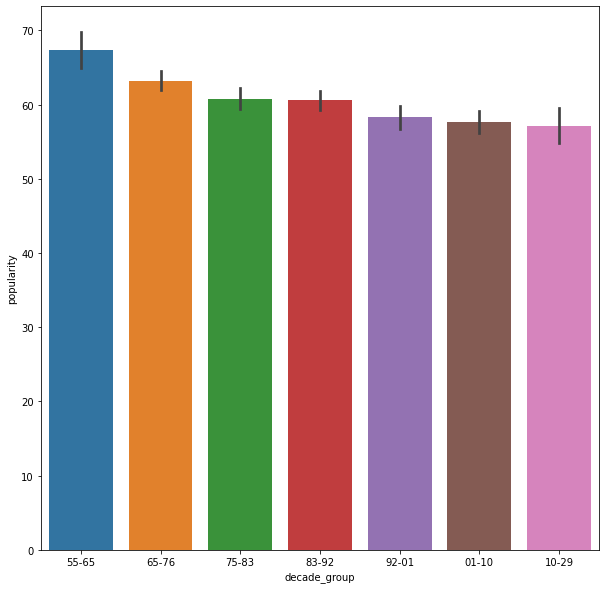

In [618]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='decade_group',y='popularity')

In [619]:
df.groupby(['decade_group']).mean()

,song_id,year,artist_id,genre_id,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
decade_group,,,,,,,,,,,,,,
55-65,1871.302326,1962.767442,299.697674,5.581395,120.767442,46.069767,49.813953,-11.116279,16.465116,59.953488,181.255814,56.651163,4.116279,67.325581
65-76,1326.199288,1970.000000,373.434164,3.434164,120.160142,50.818505,47.950178,-10.896797,18.003559,51.572954,262.459075,39.241993,4.786477,63.181495
75-83,1114.163265,1978.727891,385.255102,2.802721,120.445578,60.812925,56.231293,-9.622449,19.452381,59.646259,280.023810,27.510204,5.068027,60.734694
83-92,1431.638889,1987.833333,412.330247,3.805556,119.253086,61.660494,54.472222,-10.126543,18.490741,51.666667,285.268519,22.929012,4.484568,60.601852
92-01,1398.195572,1997.025830,334.704797,4.180812,118.678967,59.889299,52.416974,-8.675277,18.852399,42.302583,261.892989,26.627306,4.756458,58.321033
01-10,215.465517,2006.005747,91.270115,4.040230,121.729885,64.327586,53.942529,-7.281609,19.410920,46.324713,254.537356,25.129310,5.172414,57.701149
10-29,616.624242,2014.842424,206.093939,4.342424,119.275758,60.609091,54.393939,-7.596970,19.196970,45.512121,248.672727,27.663636,5.369697,57.063636


In [620]:
df_group = df.groupby(['decade_group','genre_name'],as_index=False).mean()\
.sort_values(by=['decade_group','popularity'], ascending=[True,False]).dropna()


df_group

,decade_group,genre_name,song_id,year,artist_id,genre_id,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity
2,55-65,british invasion,1847.111111,1964.333333,113.000000,22.0,127.888889,56.111111,53.000000,-9.888889,9.444444,69.888889,149.555556,42.333333,3.666667,71.222222
0,55-65,adult standards,1896.833333,1960.944444,349.611111,0.0,117.111111,35.666667,46.222222,-12.111111,17.388889,54.666667,181.388889,71.000000,4.666667,68.000000
3,55-65,country,1836.500000,1963.500000,53.000000,14.0,107.500000,56.000000,67.500000,-9.000000,31.500000,78.000000,157.000000,40.500000,3.000000,64.500000
16,55-65,rock,1859.000000,1964.000000,390.785714,1.0,122.785714,51.571429,49.857143,-10.928571,17.642857,57.785714,204.928571,49.714286,3.857143,64.357143
35,65-76,soul,1382.500000,1969.000000,502.125000,8.0,128.000000,50.750000,54.625000,-11.375000,16.500000,56.375000,188.375000,30.625000,6.375000,70.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,10-29,big beat,635.000000,2015.000000,189.000000,28.0,136.000000,90.000000,65.000000,-11.000000,15.000000,61.000000,222.000000,0.000000,4.000000,54.000000
108,10-29,adult standards,620.750000,2014.750000,238.000000,0.0,121.250000,47.000000,39.000000,-7.250000,17.000000,35.250000,238.750000,65.250000,3.500000,50.250000
111,10-29,country,523.333333,2012.666667,144.333333,14.0,79.333333,41.000000,53.666667,-13.666667,58.666667,74.000000,223.000000,56.666667,4.666667,41.000000
116,10-29,funk,589.000000,2014.000000,223.000000,29.0,92.000000,88.000000,66.000000,-3.000000,69.000000,77.000000,348.000000,3.000000,9.000000,41.000000


# Top 5 genres per decade

DECADE GROUP 55-65
                  popularity
genre_name                  
british invasion   71.222222
adult standards    68.000000
country            64.500000
rock               64.357143


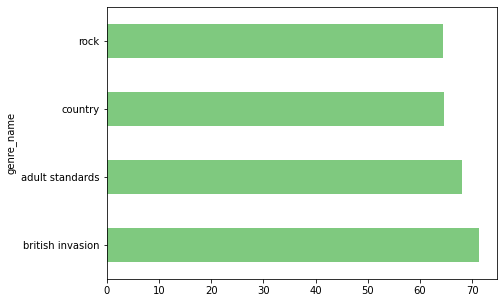

DECADE GROUP 65-76
                  popularity
genre_name                  
soul               70.500000
british invasion   67.636364
folk               65.000000
rock               64.230303
adult standards    63.702128


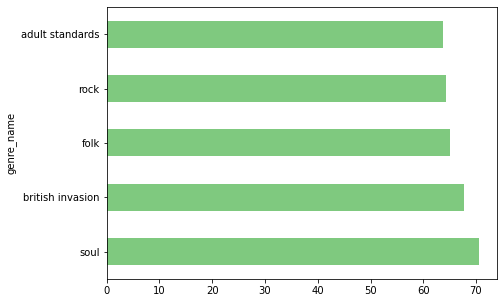

DECADE GROUP 75-83
                 popularity
genre_name                 
mellow gold       76.500000
soul              71.333333
reggae            67.666667
disco             62.166667
adult standards   61.782609


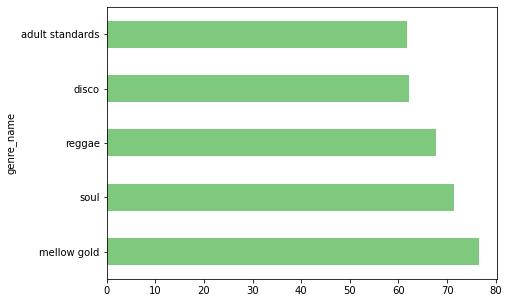

DECADE GROUP 83-92
             popularity
genre_name             
metal         68.451613
hip hop       68.000000
mellow gold   62.000000
folk          61.000000
pop           61.000000


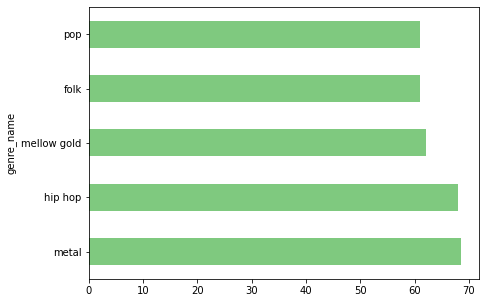

DECADE GROUP 92-01
                  popularity
genre_name                  
hip hop            74.000000
reggae             74.000000
permanent wave     69.666667
funk               67.000000
british invasion   67.000000


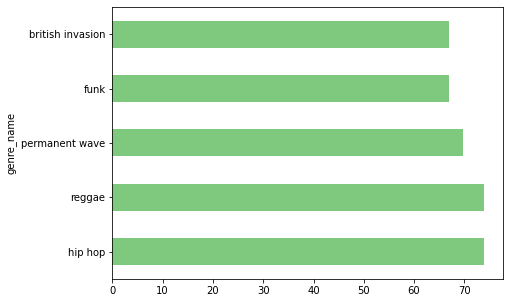

DECADE GROUP 01-10
                popularity
genre_name                
hip hop          77.285714
neo mellow       72.545455
funk             72.000000
soul             67.700000
permanent wave   67.352941


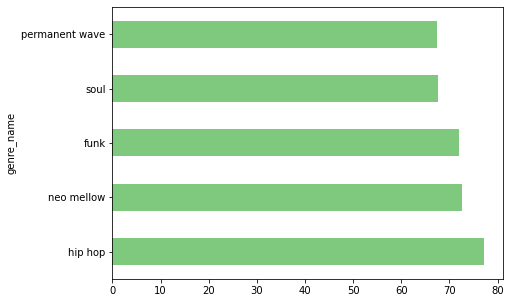

DECADE GROUP 10-29
                popularity
genre_name                
mellow gold      74.000000
permanent wave   72.300000
neo mellow       69.333333
folk             68.333333
disco            68.000000


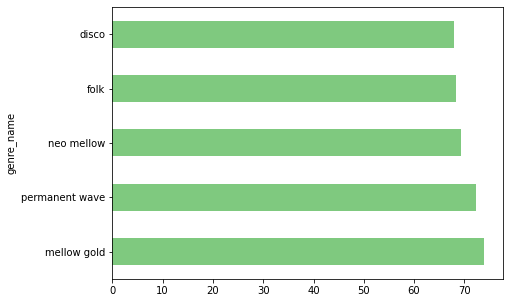

In [621]:
# fig = plt.figure(figsize=(15,12))
test = False
head_num = 5
for i in df_group['decade_group'].unique():
    #fig = plt.figure(figsize=(15,12))
    print(f"DECADE GROUP {i}")

    temp = df[df['decade_group'] == i].groupby('genre_name')[['genre_name','popularity']].mean()
    temp = temp.sort_values(by='popularity',ascending=False)
    #plt.title(f"DECADE GROUP {i}")
    print(temp.head(head_num))
    
    temp.head(head_num).plot.barh(y='popularity', colormap='Accent',legend=False,figsize=(7, 5))

    if test:
        temp.head(head_num).plot.bar(y='popularity', colormap='copper',legend=False,figsize=(7, 5))
        temp.head(head_num).plot.pie(y='popularity', colormap='seismic',legend=False,figsize=(7, 5))
        temp.head(head_num).plot.barh(y='popularity', colormap='Accent',legend=False,figsize=(7, 5))
        temp.head(head_num).plot.box(y='popularity', colormap='Accent',legend=False,figsize=(7, 5))
        temp.head(head_num).plot.area(y='popularity', colormap='Accent',legend=False,figsize=(7, 5))


    #plt.tight_layout()    
    plt.show()


In [622]:
# Top 2 Artist per genres per decade

In [623]:
df.head(1)

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity,decade_group
0,0,Sunrise,2004,0,0,adult standards,Norah Jones,157,30,53,-14,11,68,201,94,3,71,01-10


In [624]:
df_artists = df.groupby(['decade_group','artist_name'])['bpm']\
.count().sort_values(ascending=False).reset_index()


df_artists

,decade_group,artist_name,bpm
0,65-76,The Beatles,22
1,75-83,ABBA,20
2,75-83,Queen,16
3,92-01,George Michael,15
4,83-92,Queen,15
...,...,...,...
4594,75-83,Kid Rock,0
4595,75-83,Killing Joke,0
4596,75-83,Kim Wilde,0
4597,75-83,Kings of Leon,0


In [625]:
for i in df_artists['decade_group'].unique():
    temp = df_artists[df_artists['decade_group'] == i]
    print(i)
    print(temp['artist_name'].head(3))

65-76
0                     The Beatles
7    Creedence Clearwater Revival
8              The Rolling Stones
Name: artist_name, dtype: object
75-83
1                         ABBA
2                        Queen
24    Bob Marley & The Wailers
Name: artist_name, dtype: object
92-01
3     George Michael
34         Radiohead
45           Nirvana
Name: artist_name, dtype: object
83-92
4      Queen
6         U2
12    Prince
Name: artist_name, dtype: object
01-10
5     Coldplay
21        Muse
30    Doe Maar
Name: artist_name, dtype: object
10-29
9     Ed Sheeran
10         Adele
11    Kensington
Name: artist_name, dtype: object
55-65
18           The Beatles
43         Elvis Presley
68    The Rolling Stones
Name: artist_name, dtype: object


In [626]:
df['genre_name'].nunique()

18

In [627]:
df['genre_name'].unique()

array(['adult standards', 'rock', 'hip hop', 'metal', 'pop', 'dutch',
       'permanent wave', 'dance', 'soul', 'disco', 'neo mellow',
       'country', 'folk', 'reggae', 'british invasion', 'mellow gold',
       'big beat', 'funk'], dtype=object)

In [628]:
def genre_colaspe(genre_att):
    genres = 'rock metal pop jazz soul blues punk country folk funk\
    rap house dance dutch indie singer-songwriter latin reggae'.split()
    genres.append('hip hop')
    #print(genres)
    for genre in genres:
        if genre in genre_att:
            return genre
    return genre_att
#     if 'rock' in genre:
#         return 'rock'
#     elif  'hip hop' in genre:
#         return 'hip hop'
#     elif 'metal' in genre:
#         return 'metal'
#     else:
#         return genre
    

In [629]:
# df2 = df.copy()

In [630]:
df2['genre_name'].unique()

array(['adult standards', 'rock', 'hip hop', 'metal', 'pop', 'dutch',
       'permanent wave', 'dance', 'soul', 'disco', 'big room',
       'neo mellow', 'boy band', 'carnaval limburg', 'country', 'latin',
       'folk', 'celtic', 'chanson', 'electro', 'downtempo', 'reggae',
       'british invasion', 'jazz', 'trance', 'singer-songwriter',
       'mellow gold', 'blues', 'big beat', 'funk', 'happy hardcore',
       'classic schlager', 'gabba', 'edm', 'electronica', 'indie',
       'stomp and holler', 'australian psych', 'laboratorio',
       'classic soundtrack', 'compositional ambient', 'streektaal', 'ccm',
       'house', 'australian americana', 'j-core', 'punk', 'basshall',
       'christelijk', 'levenslied', 'rap', 'motown', 'bebop'],
      dtype=object)

In [631]:
df2['genre_name'].nunique()

53

In [632]:
df2['genre_name'] = df2['genre_name'].apply(genre_colaspe)


In [633]:
for i in df2['genre_name'].unique():
    if len(i.split()) > 1:
        print(i)

adult standards
hip hop
permanent wave
big room
neo mellow
boy band
carnaval limburg
british invasion
mellow gold
big beat
happy hardcore
classic schlager
stomp and holler
australian psych
classic soundtrack
compositional ambient
australian americana


In [644]:
# df2.to_csv('data_engineer_genre.csv',index=False)

In [645]:
# data = pd.read_csv("Spotify-2000.csv")
# data.head(1)

In [636]:
df.head()

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity,decade_group
0,0,Sunrise,2004,0,0,adult standards,Norah Jones,157,30,53,-14,11,68,201,94,3,71,01-10
1,33,Don't Know Why,2002,0,0,adult standards,Norah Jones,88,20,73,-12,7,62,186,88,3,74,01-10
2,10,Love Me Tender,2002,10,0,adult standards,Elvis Presley,109,5,44,-16,11,31,162,88,4,49,01-10
3,144,A Little Less Conversation - JXL Radio Edit Remix,2002,10,0,adult standards,Elvis Presley,115,97,60,-6,13,72,212,0,5,64,01-10
4,387,(You're The) Devil in Disguise,2002,10,0,adult standards,Elvis Presley,123,73,48,-8,11,87,140,57,17,65,01-10


In [637]:
df[df['genre_name']== 'rap']

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity,decade_group


In [638]:
df[df['genre_name'] == 'hip hop']

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity,decade_group
980,2,Clint Eastwood,2001,2,2,hip hop,Gorillaz,168,69,66,-9,7,52,341,2,17,69,92-01
981,361,Feel Good Inc.,2005,2,2,hip hop,Gorillaz,139,71,82,-7,61,77,223,1,18,80,01-10
982,9,Without Me,2002,9,2,hip hop,Eminem,112,67,91,-3,24,66,290,0,7,82,01-10
983,27,Cleanin' Out My Closet,2002,9,2,hip hop,Eminem,148,76,91,-5,8,87,298,7,17,71,01-10
984,114,"Lose Yourself - From ""8 Mile"" Soundtrack",2005,9,2,hip hop,Eminem,171,74,69,-5,36,6,326,1,26,77,01-10
985,192,The Real Slim Shady,2000,9,2,hip hop,Eminem,105,66,95,-4,5,76,284,3,6,80,92-01
986,219,Stan,2000,9,2,hip hop,Eminem,80,77,78,-4,52,51,404,4,24,75,92-01
987,546,The Monster,2013,9,2,hip hop,Eminem,110,85,78,-4,12,62,250,5,7,75,10-29
988,1824,My Name Is,1999,9,2,hip hop,Eminem,86,68,87,-6,9,82,268,4,32,72,92-01
989,106,Numb / Encore,2004,83,2,hip hop,JAY-Z,107,79,69,-4,58,75,206,6,17,75,01-10


In [639]:
df[df['artist_name'] == '2Pac']

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity,decade_group
1940,399,Changes,2007,223,29,funk,2Pac,111,66,87,-7,14,32,269,4,8,72,01-10
1941,589,California Love,2014,223,29,funk,2Pac,92,88,66,-3,69,77,348,3,9,41,10-29
1942,1683,Dear Mama,1995,223,29,funk,2Pac,84,54,77,-7,13,32,280,37,10,72,92-01


In [640]:
genre_less10 = []
for i in df.genre_name.unique():
    #print(i,len(df[df['genre_name'] == i]))
    if len(df[df['genre_name'] == i]) < 11:
        genre_less10.append(i)
    
    
genre_less10

[]

In [641]:
df3 = df.copy()

In [642]:
df3 = df3[~df3['genre_name'].isin(genre_less10)]

In [643]:
df3

,song_id,title,year,artist_id,genre_id,genre_name,artist_name,bpm,energy,danceability,db,liveness,valence,length,acousticness,speechiness,popularity,decade_group
0,0,Sunrise,2004,0,0,adult standards,Norah Jones,157,30,53,-14,11,68,201,94,3,71,01-10
1,33,Don't Know Why,2002,0,0,adult standards,Norah Jones,88,20,73,-12,7,62,186,88,3,74,01-10
2,10,Love Me Tender,2002,10,0,adult standards,Elvis Presley,109,5,44,-16,11,31,162,88,4,49,01-10
3,144,A Little Less Conversation - JXL Radio Edit Remix,2002,10,0,adult standards,Elvis Presley,115,97,60,-6,13,72,212,0,5,64,01-10
4,387,(You're The) Devil in Disguise,2002,10,0,adult standards,Elvis Presley,123,73,48,-8,11,87,140,57,17,65,01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,1418,The Cross,1987,527,29,funk,Prince,99,64,44,-7,64,25,286,53,6,42,83-92
1954,1559,Diamonds and Pearls,1991,527,29,funk,Prince,81,55,55,-10,7,29,285,5,3,47,83-92
1955,1691,Gold,1995,527,29,funk,Prince,90,86,53,-3,13,44,443,0,3,46,92-01
1956,1673,Gangsta's Paradise,1995,655,29,funk,Coolio,80,51,65,-10,40,39,241,7,6,80,92-01
